<a href="https://colab.research.google.com/github/Tj-dev-py/Speech-Commands-Classification/blob/main/Speech_Commands_(Data_Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display

In [51]:
# filepath
filename = '/content/drive/MyDrive/Speech Commands Audio Classification /augmented_dataset/down/down_1002.wav'

In [52]:
# libraries to help us display audio graphs
import IPython.display as ipd
import librosa.display

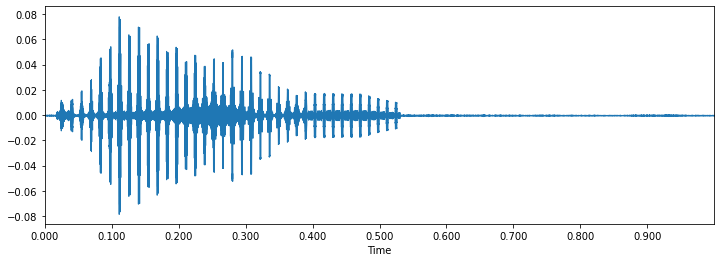

In [53]:
# displaying the sample audio file
plt.figure(figsize=(12, 4))
data, sample_rate = librosa.load(filename)

librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

In [54]:
# Let's read a sample audio using librosa

audio_file_path = '/content/drive/MyDrive/Speech Commands Audio Classification /augmented_dataset/down/down_1004.wav'

librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [55]:
librosa_audio_data

array([0.00635889, 0.00802025, 0.00710175, ..., 0.00062952, 0.00080124,
       0.00057838], dtype=float32)

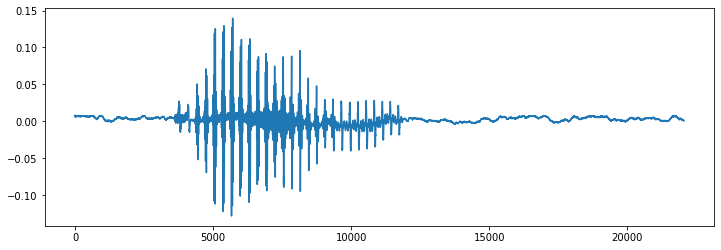

In [56]:
# plotting the librosa audio data, original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.show()

In [57]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
mfccs.shape

(40, 44)

In [58]:
# Extracting mfccs for every audio file
import os
audio_dataset_path = '/content/drive/MyDrive/Speech Commands Audio Classification /augmented_dataset'

In [59]:
# feature extractor function
import numpy as np

def feature_extractor(file):
  audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

  return mfccs_scaled_features

In [63]:
import pandas as pd

data = []
for folder in sorted(os.listdir('/content/drive/MyDrive/Speech Commands Audio Classification /augmented_dataset')):
    for file in sorted(os.listdir('/content/drive/MyDrive/Speech Commands Audio Classification /augmented_dataset/'+folder)):
        data.append((folder, file))

df = pd.DataFrame(data, columns=['Folder', 'File'])

In [64]:
df

,Folder,File
0,down,down_1002.wav
1,down,down_1003.wav
2,down,down_1004.wav
3,down,down_1007.wav
4,down,down_1008.wav
...,...,...
27566,zero,zero_99.wav
27567,zero,zero_993.wav
27568,zero,zero_994.wav
27569,zero,zero_998.wav


In [69]:
from tqdm import tqdm

# Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients
extracted_features = []

for index_num, row in tqdm(df.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path) + '/' + str(row['Folder']) + '/', 
                           str(row['File']))
  final_class_labels = row['Folder']
  data = feature_extractor(file_name)
  extracted_features.append([data, final_class_labels])

27571it [36:31, 12.58it/s]


In [71]:
extracted_features[:2]

[[array([-5.8853461e+02,  1.6572563e+02, -1.9976339e+01,  2.5505146e+01,
         -8.3750334e+00, -1.4104003e+01,  3.9024839e+00,  3.2419455e+00,
         -2.0375555e+01,  2.4202862e+00, -5.1736903e+00, -9.4041376e+00,
          3.1372306e+00, -1.4132766e+01,  3.5506675e+00,  4.8787546e+00,
         -5.7019010e+00, -6.2434783e+00,  7.6847777e+00, -4.2637515e+00,
         -8.2713289e+00,  3.0736094e+00, -4.5413795e+00,  1.3991044e-01,
         -5.8631668e+00,  3.7657783e+00,  1.6520581e+00, -3.7690094e+00,
          3.3976632e-01, -8.0722868e-01, -7.1054667e-02, -5.2049375e+00,
          2.4670000e+00, -3.0945051e+00, -1.1439281e+00,  6.9667208e-01,
         -3.1685820e+00, -2.9696727e-02, -1.4338751e+00, -3.3250368e-01],
        dtype=float32), 'down'],
 [array([-5.36729248e+02,  1.96676559e+02, -4.21500359e+01,  2.82700634e+01,
         -3.38422942e+00, -2.20895042e+01,  4.80113268e+00,  4.84922838e+00,
         -2.21200886e+01,  5.95539284e+00, -1.55936289e+00, -8.90308475e+00,
     

In [70]:
#converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-588.5346, 165.72563, -19.97634, 25.505146, -...",down
1,"[-536.72925, 196.67656, -42.150036, 28.270063,...",down
2,"[-535.14197, 170.9807, -19.985088, 34.06252, 1...",down
3,"[-488.70197, 229.5985, -70.07708, 33.4808, 10....",down
4,"[-546.6566, 166.20728, -41.497158, 28.023365, ...",down


In [72]:
# Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [73]:
# saving as pickle file
ext_dataframe = extracted_features_df.copy()
ext_dataframe.to_pickle("extracted_features.pkl")